# The Stoner-Wolfharth model for Magnetic Hysteresis
Instructions:  

After opening the file, run the Python 2 kernel. Wait for the kernel to start  
The code sohuld autorun, but if it does not you can manually select the cells and run them  
You can interact with the plot to change the parameters and it will auto-update  

In [1]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
            });
        }
    );
</script>

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


<function __main__.SWplt>

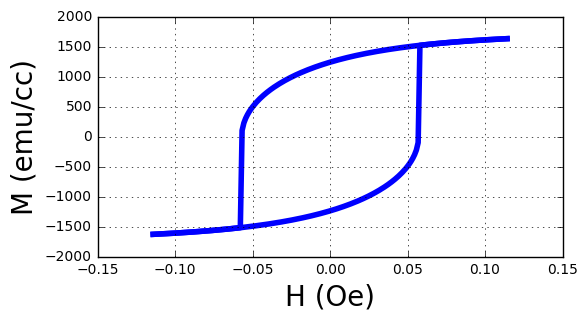

In [3]:
%matplotlib inline
from ipywidgets import *
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import brentq

def SW(Ms, H, theta):
    theta = theta/360.0*2.0*np.pi
    phis1=[]
    phis2=[]
    ### Top part
    for h in H: 
        F = lambda phi : 0.5*np.sin(2*(phi-theta)) + h*np.sin(phi) 
        phi = np.linspace(0, np.pi, points)
        
        phi_initial_guess = 0.8
        
        if max(F(phi)) > 0:
                p = brentq(F, 0, phi[np.argmax(F(phi))])
        else:
            p = np.pi
        phis1.append(p)
    phis1 = np.array(phis1,dtype='float')
    ### Bottom part          
    for h in H:
        F = lambda phi : 0.5*np.sin(2*(phi-theta)) + h*np.sin(phi) 
        phi = np.linspace(2*np.pi, np.pi, points)
        
        phi_initial_guess = 4.0
        if max(F(phi)) > 0:
                p = brentq(F, np.pi, phi[np.argmax(F(phi))])
        else:
            p = 0
        phis2.append(p)
    phis2 = np.array(phis2, dtype='float')
    
    for i in range(len(phis1)):
        if H[i] < 0 and np.cos(phis2[i]) > np.cos(phis1[i]):
            phis1[i] = phis2[i]
    for i in range(len(phis2)):
        if H[i] > 0 and np.cos(phis2[i]) > np.cos(phis1[i]):
            phis2[i] = phis1[i]
    return phis1, phis2
points = 200
H = np.linspace(-1.0,1.0,points)
Ms=1752 #saturation of iron
Ku=1.0e5 #anisotropy of iron
theta0 = 45.0
def SWplt(Ku, Ms, theta):
    mu0 = 4*np.pi*1.0e-7 #V*s/(A*m)
    points = 200
    h = np.linspace(-1.0,1.0,points)
    Hk = (2*Ku)/(Ms)
    H = h*Hk*1.0e-3
    
    phis1, phis2 = SW(Ms, h, theta)
    fig, ax = plt.subplots()
    subplots_adjust(bottom=0.3)
    
    l, = plot(H, Ms*np.cos(phis1), 'b', linewidth=4)
    k, = plot(H, Ms*np.cos(phis2), 'b', lw = 4)

#     ax.set_ylim([-1.1,1.1])
#     ax.set_xlim([-1.1,1.1])
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xlabel('H (Oe)', fontsize=20)
    ax.set_ylabel('M (emu/cc)',fontsize=20)
    plt.grid(b=True, which='both')

stheta = BoundedFloatText(value=theta0, min =0.0, max = 89.9, description= ''r'$\theta$ (deg)' )
Msbox = BoundedFloatText(value=Ms, min =0.2, max = 2000., description='M'r'$_s$ (T)' )
Kubox = BoundedFloatText(value=Ku, min =0.2, max = 1.0e6, description='K'r'$_u$' )
   
interact(SWplt, Ku = Kubox, Ms = Msbox, theta=stheta)

#h = μ0MsH/2Ku
# H = h/mu0 / Ms*2*Ku

